In [1]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [2]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [3]:
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
#X = X.to(device)
#Y = Y.to(device)

In [4]:
import torch.nn as nn

In [5]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x
    
  

In [6]:
#mynet = MyNeuralNet().to(device)
mynet=MyNeuralNet()
# to get weights of any layer uncomment next instruction to get weights of hideen layer to output
#mynet.hidden_to_output_layer.weight
for i in mynet.parameters():
    print(i)

Parameter containing:
tensor([[-0.6236, -0.0539],
        [-0.5109, -0.3365],
        [-0.4527,  0.6982],
        [ 0.0245,  0.3158],
        [-0.0803,  0.3254],
        [ 0.6214, -0.1568],
        [ 0.2098,  0.0816],
        [-0.1152,  0.0421]], requires_grad=True)
Parameter containing:
tensor([ 0.0425,  0.6878, -0.4457,  0.6600, -0.1522, -0.2200, -0.4722,  0.1036],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0407, -0.3506, -0.2314, -0.3288, -0.1872, -0.3226,  0.1291, -0.2734]],
       requires_grad=True)
Parameter containing:
tensor([-0.0671], requires_grad=True)


In [7]:
loss_func = nn.MSELoss()

In [8]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(141.8931, grad_fn=<MseLossBackward0>)


In [9]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [10]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value)
%timeit loss_history


31.9 ns ± 1.15 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

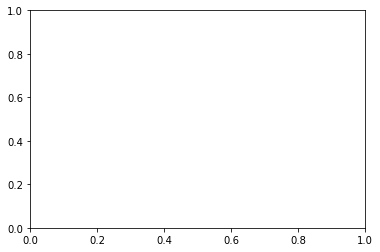

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [14]:
z=torch.tensor([[1.,2.,3.]],requires_grad=True)

In [15]:
z=z.detach().numpy()

In [19]:
type(z)

numpy.ndarray